In [185]:
# import Dependencies 
import pandas as pd
import csv as csv
import  numpy as np
import scipy as sts
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Added for Arpi's code
import scipy.stats as st
# Added for Joshua's code
import seaborn as sns
import matplotlib.pyplot as plt1

In [186]:
# Path csv
path = "Resources/csv_files/movie_list.csv"

# Read in csv file
csv = pd.read_csv(path)

In [187]:
# Need to fill empty sections with "NaN" so that we can use .dropna and remove rows with empty data

# Set float("NaN") variable
nan_value = float("NaN")
# Use .replace to replace " " (empty data), with nan_value, inplace=True
csv.replace(" ", nan_value, inplace=True)
# Use .dropnawith implace=True to drop NaN Values
csv.dropna(inplace=True)

In [188]:
# Create clean csv
clean_csv = csv
#clean_csv.head()

# Save clean_csv
clean_csv.to_csv("Resources/clean_csv.csv")

## Check for any Outliers from Total Profit amounts

In [189]:
# Confirm all data is equal
#clean_csv.count() # 563 total count

# Sort "Profit%" for quartile data
sorted_csv = clean_csv.sort_values("Profit%", ascending=True)

<Figure size 504x360 with 0 Axes>

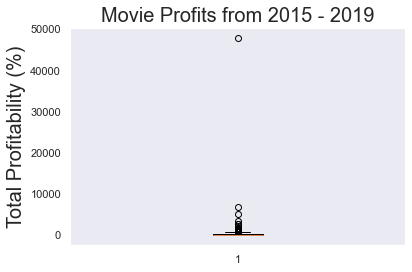

In [190]:
# Set variable to check for outliers
profit = sorted_csv["Profit%"]

# Set up for plot
plt.figure(figsize=(7, 5))
fig1, ax1 = plt.subplots()

# Assign titles and fontsize
ax1.set_title("Movie Profits from 2015 - 2019", fontsize=20)
ax1.set_ylabel("Total Profitability (%)", fontsize=20)

# Set plot to profit variable
ax1.boxplot(profit)

# Get quartiles, lower, upper, and iqr
quartiles = profit.quantile([.25, .5, .75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

# Print results
# print(f"The lower quartile of movie profitability is: {lowerq}.")
# print(f"The upper quartile of movie prifitability is: {upperq}.")
# print(f"The interquartile range of movie profitability is: {iqr}.")
# print(f"The median of movie profitability is: {quartile[0.5]}.")

# Get lower and upper bound figure
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

# Print results
# print(f"Values below {lower_bound} could be outliers.")
# print(f"Values above {upper_bound} could be outliers.")

# Add grid
plt.grid()

# Save
plt.savefig("Images/outlier_chart")
plt.show()

## Quartile results for Movie Profit (%)

* The lower quartile of movie profits is: -26%

* The upper quartile of movie profits is: 289%

* The interquartile range of movie profits is: 315%

* The median of movie profits is: 82%

* Values below -500% could be outliers.

* Values above 763% could be outliers.

## Remove outlier 

* tconst: tt6108090 (Secret Supertar) had the largest gap with over 40,000% from the rest of the population. 

In [191]:
# Use .groupby for ("genres") for bar chart later on so that it includes all genres
genres = clean_csv.groupby("genres")
# Create genres_cout for bar chart
genres_count = genres["genres"].count()
#genres_count

In [192]:
# Using clean_csv apply sort_values to "Profit%" ascending=False to identify highest profit (outlier)
#clean_csv.sort_values("Profit%", ascending=False).head()
# Use .drop for index 365 which is tt61008090 (outlier)
#csv_without_outlier = clean_csv.drop([365])
# Using csv_without_outlier sort_values to "Profit%" and ascending=False to confirm highest profit (outlier) has been removed
#csv_without_outlier.sort_values("Profit%", ascending=False).head() # Removed and count is now 562

# Realized need to remove all upper and lower outliers and that .loc is the best effecient method but learned to drop a row!

In [193]:
# Use .loc to filter out lower and upper outliers
no_outliers = clean_csv.loc[(clean_csv["Profit%"] < 763) &
                            (clean_csv["Profit%"] > -500)]

# Save to csv
no_outliers.to_csv("Resources/no_outliers.csv")

## Visualizations

The r-squared is: 0.04272375140623016


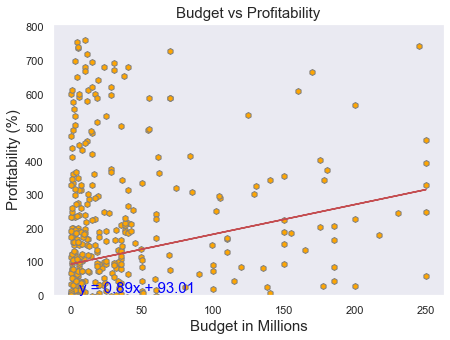

<Figure size 432x288 with 0 Axes>

In [201]:
# Set variables without outlier
budget = no_outliers["budget"]/1000000
profit = no_outliers["Profit%"]

# Set x and y values _df to extraxt from 
x_values =  budget
y_values =  profit

plt.figure(figsize=(7, 5))
# Create scatter plot and linear regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, marker="h", color="orange", edgecolor="gray")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="blue")

# Assign labels
plt.title("Budget vs Profitability", fontsize=15)
plt.xlabel("Budget in Millions", fontsize=15)
plt.ylabel("Profitability (%)", fontsize=15)

plt.ylim(0, max(profit)+50)

# Retrieve r-squared value squared 
print(f"The r-squared is: {rvalue**2}")

# Display
plt.grid()

# Save scatter plot as png
plt.savefig("Images/budget_profit")

# Display
plt.show()
plt.tight_layout()

The r-squared is: 0.07145601615967595


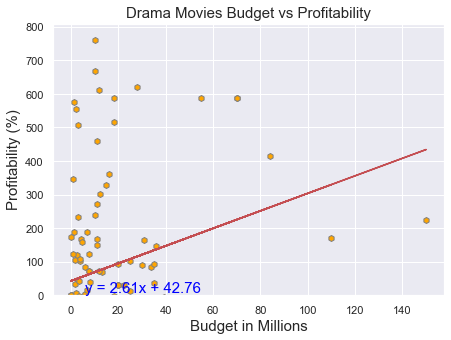

<Figure size 432x288 with 0 Axes>

In [202]:
# Create drame_df using .loc to gather only drama data
drama_df = no_outliers.loc[(no_outliers["genres"] == "Drama")]

# Set variables
drama_budget = drama_df["budget"]/1000000 
drama_profit = drama_df["Profit%"]

# Set x and y values 
x_values =  drama_budget
y_values =  drama_profit

plt.figure(figsize=(7, 5))
# Create scatter plot and linear regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, marker="h", color="orange", edgecolor="gray")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="blue")

# Assign labels
plt.title("Drama Movies Budget vs Profitability", fontsize=15)
plt.xlabel("Budget in Millions", fontsize=15)
plt.ylabel("Profitability (%)", fontsize=15)

plt.ylim(0, max(profit)+50)

# Retrieve r-squared value squared 
print(f"The r-squared is: {rvalue**2}")

# Save scatter plot as png
plt.savefig("Images/drama_budget_profit")

# Display
plt.show()
plt.tight_layout()

The r-squared is: 0.13064665563263123


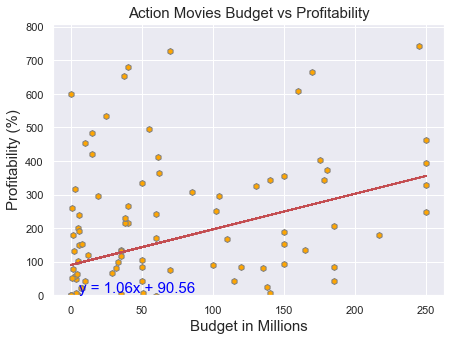

<Figure size 432x288 with 0 Axes>

In [203]:
# Create action_df using .loc to gather only action data
action_df = no_outliers.loc[(no_outliers["genres"] == "Action")]

# Set variables
action_budget = action_df["budget"]/1000000 
action_profit = action_df["Profit%"]

# Set x and y values 
x_values =  action_budget
y_values =  action_profit

plt.figure(figsize=(7, 5))
# Create scatter plot and linear regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, marker="h", color="orange", edgecolor="gray")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="blue")

# Assign labels
plt.title("Action Movies Budget vs Profitability", fontsize=15)
plt.xlabel("Budget in Millions", fontsize=15)
plt.ylabel("Profitability (%)", fontsize=15)

plt.ylim(0, max(profit)+50)

# Retrieve r-squared value squared 
print(f"The r-squared is: {rvalue**2}")

# Save scatter plot as png
plt.savefig("Images/action_budget_profit")

# Display
plt.show()
plt.tight_layout()

The r-squared is: 0.0036051739671917192


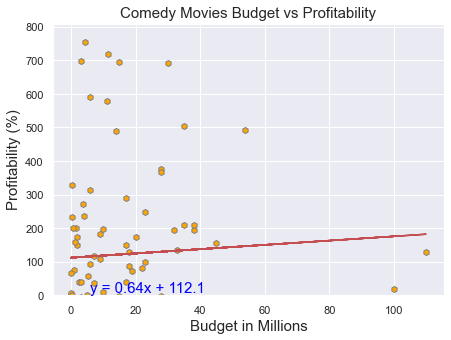

<Figure size 432x288 with 0 Axes>

In [204]:
# Create comedy_df using .loc to gather all comedy data
comedy_df = no_outliers.loc[(no_outliers["genres"] == "Comedy")]

# Set variables
comedy_budget = comedy_df["budget"]/1000000 
comedy_profit = comedy_df["Profit%"]

# Set x and y values 
x_values =  comedy_budget
y_values =  comedy_profit

plt.figure(figsize=(7, 5))
# Create scatter plot and linear regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, marker="h", color="orange", edgecolor="gray")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="blue")

# Assign labels
plt.title("Comedy Movies Budget vs Profitability", fontsize=15)
plt.xlabel("Budget in Millions", fontsize=15)
plt.ylabel("Profitability (%)", fontsize=15)

plt.ylim(0, max(profit)+50)

# Retrieve r-squared value squared 
print(f"The r-squared is: {rvalue**2}")

# Save scatter plot as png
plt.savefig("Images/comedy_budget_profit")

# Display
plt.show()
plt.tight_layout()

The r-squared is: 0.0824432377075029
The correlation coefficient between budget and profitability is nan


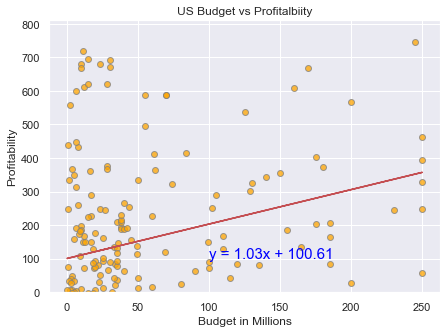

In [205]:
#sctatter for US movies only based on cleaner data
us_df = no_outliers.loc[(no_outliers['origin_country'] =="US")]

# set variables
us_budget = us_df['budget']/1000000
us_profit = us_df['Profit%']

# Set x and y values
x_values = us_budget
y_values = us_profit

# Create scatter plot and linear regression line
plt.figure(figsize=(7, 5))
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_axis = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker="o", facecolors="orange", edgecolors="gray", alpha=0.75)
plt.plot(x_values,regress_axis,"r-")
plt.annotate(line_eq,(100,100),fontsize=15,color="blue")

# Assign labels
plt.xlabel("Budget in Millions")
plt.ylabel("Profitability")
plt.title("US Budget vs Profitalbiity")

plt.ylim(0, max(profit)+50)

# Print
print(f"The r-squared is: {rvalue**2}")
print(f"The correlation coefficient between budget and profitability is {round(st.pearsonr(x_values,y_values)[0],2)}")

# Save image
plt.savefig("Images/only_us")

# Display
plt.show()

The r-squared is: 0.0824432377075029
The correlation coefficient between budget and profitability is 0.29


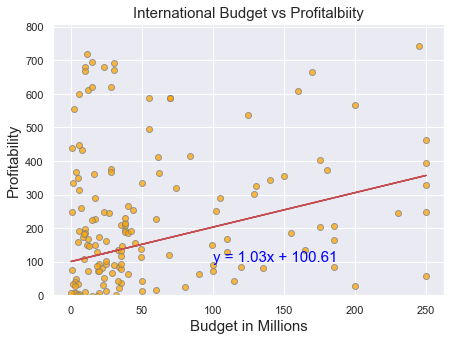

In [206]:
#sctatter for US movies only based on cleaner data
international_df = no_outliers.loc[(no_outliers['origin_country'] !="US")]

# set variables
international_budget = us_df['budget']/1000000
international_profit = us_df['Profit%']

# Set x and y values
x_values = international_budget
y_values = international_profit

# Create scatter plot and linear regression line
plt.figure(figsize=(7, 5))
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_axis = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker="o", facecolors="orange", edgecolors="gray", alpha=0.75)
plt.plot(x_values,regress_axis,"r-")
plt.annotate(line_eq,(100,100),fontsize=15,color="blue")

# Assign labels
plt.xlabel("Budget in Millions", fontsize=15)
plt.ylabel("Profitability", fontsize=15)
plt.title("International Budget vs Profitalbiity", fontsize=15)

plt.ylim(0, max(profit)+50)

# Print
print(f"The r-squared is: {rvalue**2}")
print(f"The correlation coefficient between budget and profitability is {round(st.pearsonr(x_values,y_values)[0],2)}")

# Save image
plt.savefig("Images/only_international")

# Display
plt.show()

In [217]:
revenue_grouped_by_genres = no_outliers.groupby('genres')[['Profit%']].sum()
revenue_grouped_by_genres

,Profit%
genres,
Action,17840.71
Adventure,5318.58
Animation,1334.18
Comedy,11126.62
Crime,956.26
Documentary,1350.66
Drama,10267.82
Family,1642.65
Fantasy,463.50


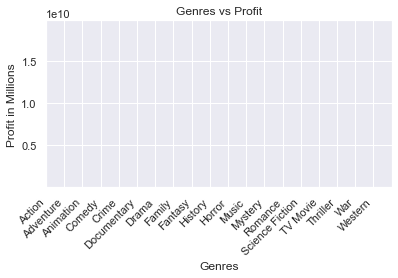

<Figure size 1080x720 with 0 Axes>

In [222]:
colors = ['red', 'green', 'blue', 'yellow', 'black', 'cyan']

fig, ax = plt.subplots()
ax.bar(revenue_grouped_by_genres.index, revenue_grouped_by_genres['Profit%'], color = colors, edgecolor = 'green', width = 0.5)

plt.title('Genres vs Profit')
plt.xlabel('Genres')
plt.ylabel('Profit in Millions')
labels = ax.get_xticklabels()
plt.setp(labels, rotation = 45, horizontalalignment = 'right')
plt.ylim(500000, 19900000000)
plt.xlim(0,19) 
plt.subplots_adjust(bottom = 0.3, left = 0.1)
plt.figure( figsize=(15,10))

#matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)[source]

plt.show()